<a href="https://colab.research.google.com/github/EFScozzina/github-slideshow/blob/master/Trabajo_final_Color_HVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabajo final Ing. Emilio F. Scozzina** 

Profesor Dr.Juan Vorobioff

**Tema:** Mejora los algoritmos desarrollados por la Dra. Małgorzata Matusiak(2012) para determinar los parametros de calidad HVI, amarillez (+b) y blancura (Rd) , mediente el uso de una red neuronal sencilla.

Objetivo: Convertir parametros del espacio de color L*a*b*, que se obtiene mediente un espectrofotometro DL65 a parametros de calidad de color HVI.
Don de la Reflactancia (Rd): expresa la blancura de la luz que reflejan las fibras del algodón. Indica el grado de pigmentación de las fibras y corresponde a la reflexión (Rd) esto se representada en la carta de color de Nickerson/Hunter. La Amarillez (+b): expresa la amarillez de la luz que reflejan las fibras del algodón. Se determina con un filtro amarillo y corresponde al valor de +b representado en la carta de color de Nickerson/Hunter.

**1) Iniciamos con  el parametros Reflactancia (Rd): expresa la blancura de la luz que reflejan las fibras del algodón.**

In [1]:

import tensorflow as tf
import numpy as np


Ingreso las tablas de entrada y salida, las mediciones de luminancia L* obtenidas con espectrofotometro DL65 8° y la tabla equivalente de Rm, reflactancia HVI. Arbitrariamente tomo diez valores de entrada y salida para realizar las pruebas, posteriormente se vera si coinciden con el algoritmo deterministico.

In [2]:
lum65 = np.array([0, 10, 20, 30, 40, 50, 60,70,80,90,100], dtype=float)
Rm = np.array([-104.1, -83.94, -63.98, -43.62, -23.46, -3.3, 16.86,37.02,57.18,77.34,97.5], dtype=float)


Utilzo el framework  Keras que es una biblioteca de Redes Neuronales de Código Abierto escrita en Python. Es capaz de ejecutarse sobre TensorFlow. 

Para la primera prueba, utilizare dos neuronas, una  de entrada y otra de salida. Es  mas que suficiente para realizar una conversión lineal. La neuronas conectadas tendran un peso y a su vez la neurona de salida tendra un sesgo. 

El proceso es sencillo, introducimos los valores de L* en la primer neurona que se multiplican por un peso y luego le suman el sesgo de salida, utilizando un modelos secuencial.

In [3]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])


La optimización de *Adam* es un método de descenso de gradiente estocástico que se basa en la estimación adaptativa de momentos de primer y segundo orden. 

La tasa de aprendizaje predeterminada en el Phyton es 0,001, en mi caso  esto es muy lento, asi que para el ejemplo fijo en 0,1. La sentencia Adam permite ajustar los pesos y sesgos para que la red aprenda (que converja a un resultado) y no desaprenda. Las perdidas las ajustamos com  la sentencia *mean_squared_error*. 

In [4]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

Para el ajuste utilizo la función *fit* y le indico que realice 1800 vueltas para entrenarse de modo arbitrario.

In [11]:
print("Comenzando entrenamiento...")
historial = modelo.fit(lum65, Rm, epochs=1800, verbose=False)
print("Modelo entrenado!")


Comenzando entrenamiento...
Modelo entrenado!


Grafico la función de perdidas,  para ver como converge la red al resultado ajustando pesos y sesgos.

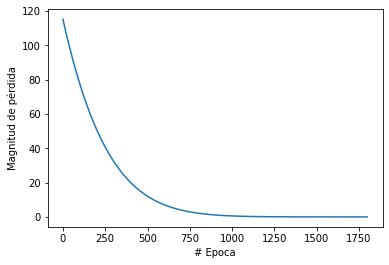

In [12]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])


Para vericar hagamos una predicción con este modelo.

In [15]:
print("Hagamos una predicción!")
resultado = modelo.predict([15.0])
print("El resultado es " + str(resultado) + " Rm HVI!")
print( "la red neuronal converge al algoritmo es Rm=2,016xL-104,1" )

Hagamos una predicción!
El resultado es [[-73.86652]] Rm HVI!
el aloritmo aproximado  por los estudios es Rm=2,016xL-104,1


Veamos que datos se asignaron a la estructura interna de la red, y como  se ajusto luego de unas 1000 vueltas a los parametros del algoritmo.  
Con lo cual queda desmotrado el metodo mediente el uso de dos neuronas y un entreamiento.

In [16]:
print ("Variables internas del modelo")
print(capa.get_weights())

Variables internas del modelo
[array([[2.015986]], dtype=float32), array([-104.106316], dtype=float32)]


**2) Mejora del modelo mediente la adición de capas de neuronas intermedias.**

In [17]:
import tensorflow as tf
import numpy as np

In [18]:
lum65 = np.array([0, 10, 20, 30, 40, 50, 60,70,80,90,100], dtype=float)
Rm = np.array([-104.1, -83.94, -63.98, -43.62, -23.46, -3.3, 16.86,37.02,57.18,77.34,97.5], dtype=float)


Realizo el mismo proceso pero agregando dos capas de neuronas intermedias, que las identifico como oculta 1 y 2. 

In [19]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [20]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [28]:
print("Comenzando entrenamiento...")
historial = modelo.fit(lum65, Rm, epochs=10000, verbose=False)
print("Modelo entrenado!")


Comenzando entrenamiento...
Modelo entrenado!


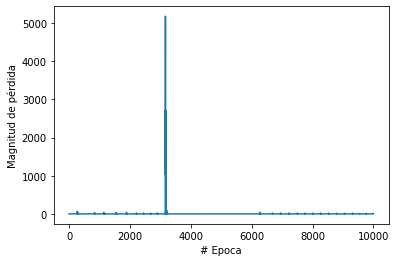

In [29]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [31]:
print("Hagamos una predicción!")
resultado = modelo.predict([15.0])
print("El resultado es " + str(resultado) + " Rm HVI!")
print( "la red neuronal converge al algoritmo es Rm=2,016xL-104,1" )

Hagamos una predicción!
El resultado es [[-73.71734]] Rm HVI!
la red neuronal converge al algoritmo es Rm=2,016xL-104,1


Veamos los pesos y sesgos que asigno automaticamente la red a cada nurona y su conección.

In [32]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.04746364, -0.12554574,  0.62435514]], dtype=float32), array([ -5.813416,  12.515904, -19.766901], dtype=float32)]
[array([[-0.98556495, -0.3097638 , -0.7936176 ],
       [ 2.3317566 ,  0.57435054,  1.5265998 ],
       [-0.82799566,  1.754795  , -0.7608157 ]], dtype=float32), array([ 15.080942, -15.30771 ,  -6.87266 ], dtype=float32)]
[array([[-0.29393095],
       [ 1.5258564 ],
       [-0.27083826]], dtype=float32), array([-12.73443], dtype=float32)]


**3) Aplicando el punto N°2 Desarrollare la solución mediente una red neuronal de la ecuecióón de la amarillez segun el modelo HVI +b.**

In [33]:
import tensorflow as tf
import numpy as np

In [34]:
bcie = np.array([0, 10, 20, 30, 40, 50, 60,70,80,90,100], dtype=float)
bHVI = np.array([0.7, 10.527, 20.354, 30.181, 40.008, 49.835, 59.662,69.489,79.316,89.136,98.97], dtype=float)


In [35]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [39]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [40]:
print("Comenzando entrenamiento...")
historial = modelo.fit(bcie,bHVI, epochs=10000, verbose=False)
print("Modelo entrenado!")


Comenzando entrenamiento...
Modelo entrenado!


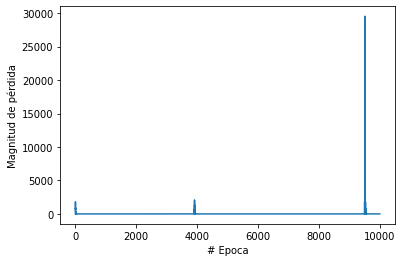

In [41]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [43]:
print("Hagamos una predicción!")
resultado = modelo.predict([15.0])
print("El resultado es " + str(resultado) + " bHVI!")
print( "la red neuronal converge al algoritmo es bHVI=0,928xbcie+0,7" )

Hagamos una predicción!
El resultado es [[15.44662]] bHVI!
la red neuronal converge al algoritmo es bHVI=0,928xbcie+0,7


In [ ]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.04746364, -0.12554574,  0.62435514]], dtype=float32), array([ -5.813416,  12.515904, -19.766901], dtype=float32)]
[array([[-0.98556495, -0.3097638 , -0.7936176 ],
       [ 2.3317566 ,  0.57435054,  1.5265998 ],
       [-0.82799566,  1.754795  , -0.7608157 ]], dtype=float32), array([ 15.080942, -15.30771 ,  -6.87266 ], dtype=float32)]
[array([[-0.29393095],
       [ 1.5258564 ],
       [-0.27083826]], dtype=float32), array([-12.73443], dtype=float32)]
